In [ ]:
# Task 2: Decision Tree Classifier on Iris Dataset

In [1]:
#Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

In [3]:
print("First 5 rows of features:\n", X.head())
print("\nTarget counts:\n", y.value_counts())

First 5 rows of features:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target counts:
 0    50
1    50
2    50
Name: species, dtype: int64


In [4]:
 # Data Cleaning
  # Check for missing values
print("\nMissing values in each column:\n", X.isnull().sum())     


Missing values in each column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [5]:
# Check for duplicate rows
duplicates = X.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 1


In [6]:
 X = X.drop_duplicates()

In [7]:
 y = y.loc[X.index]  # make sure target aligns with cleaned features

In [8]:
#  checking  for anomalies
print("\nFeature summary:\n", X.describe())


Feature summary:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         149.000000        149.000000         149.000000   
mean            5.843624          3.059732           3.748993   
std             0.830851          0.436342           1.767791   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.300000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        149.000000  
mean           1.194631  
std            0.762622  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [9]:
# Data Preprocessing

print("\nUnique target classes:", y.unique())


Unique target classes: [0 1 2]


In [10]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [11]:
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (104, 4)
Testing set size: (45, 4)


In [12]:
# Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)  # fully grown tree
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

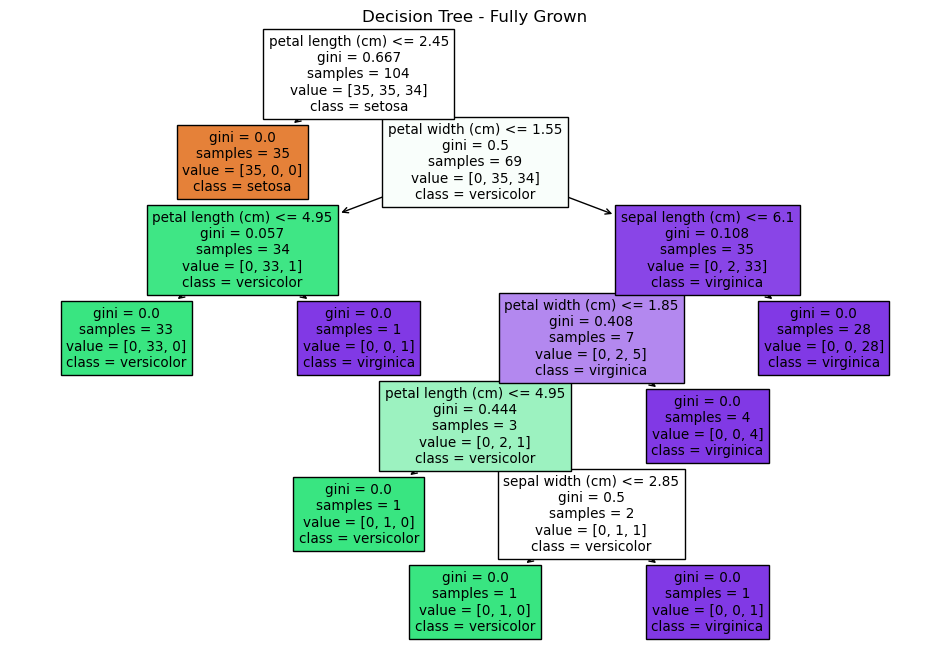

In [15]:
# Visualize Fully Grown Tree
plt.figure(figsize=(12,8))
plot_tree(
    clf, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names, 
    filled=True
)
plt.title("Decision Tree - Fully Grown")
plt.show()

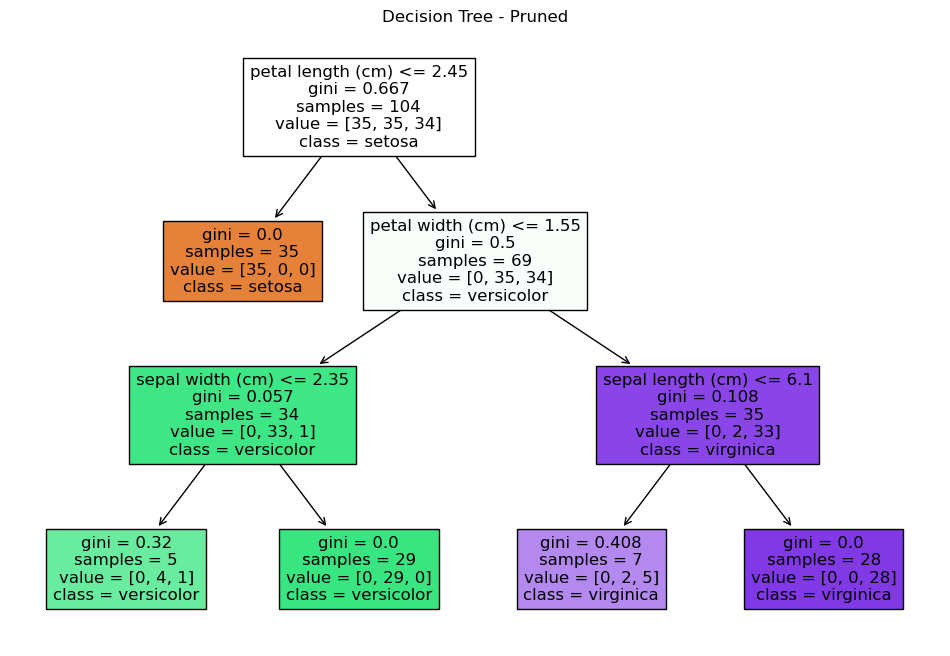

In [16]:
# Prune Tree to Avoid Overfitting
pruned_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
pruned_clf.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(
    pruned_clf, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names, 
    filled=True
)
plt.title("Decision Tree - Pruned")
plt.show()


In [17]:
#  Making Predictions

y_pred = pruned_clf.predict(X_test)

In [18]:
y_pred 

array([2, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0,
       1, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2,
       2])

In [19]:
# Evaluating the Model

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", report)

Accuracy: 0.8889
F1 Score: 0.8888

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.86      0.80      0.83        15
   virginica       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45

